# Содержание

**1. Introduction to Statistical learning**

- 1.1 Work with data and EDA
    - 1.1.1 Load data
    - 1.1.2 Check NAs
    - 1.1.3 Basic stats
    - 1.1.4 Correlations
    - 1.1.5 Scatterplot
- 1.2 Linear regression
    - 1.2.1 Running linear regression
    - 1.2.2 Improving the model
    - 1.2.3 Linear regression by hands
- 1.3 k-Nearest Neighbors
    - 1.3.1 Run kNN
    - 1.3.2 Scale the data and rerun it
    - 1.3.3 Comparison between kNN and LR
    - 1.3.4 Fitting kNN for different k

Перед тем, как переходить к практическим частям, необходимо обсудить общий жизненный цикл модели машинного обучения. Обычно в него входят следующие этапы:

- Бизнес-анализ
- Сбор, анализ и подготовка данных
- Моделирование
- Оценка решения
- Внедрение
- Тестирование и мониторинг


Разберем более подробно каждый этап:
- **Бизнес-анализ** - На этом этапе необходимо вместе с заказчиком сформулировать проблемы бизнеса, которые будет решать модель. Также, требуется понять, кто участвует в проекте со стороны заказчика, кто выделяет деньги под проект, и кто принимает ключевые решения. Вдобавок необходимо узнать существуют ли готовые решения и, если да, чем они не устраивают заказчика.

- **Сбор, анализ и подготовка данных** - Задача этого шага – понять слабые и сильные стороны в имеющихся данных, определить их достаточность, предложить идеи, как их использовать, и лучше понять бизнес-процессы заказчика. Требуется провести анализ всех источников данных, к которым заказчик предоставляет доступ.
    -  **Сбор данных** — это процесс сбора информации по интересующим переменным в установленной систематической форме, которая позволяет отвечать на поставленные вопросы исследования, проверять гипотезы и оценивать результаты.
    - **Нормализация данных** — это то место, где аналитики и инженеры данных обычно проводят большую часть своего времени: очистка и нормализация "грязных" данных. 
    - **Конструирование признаков**  - состоит из учета, статистической обработки и преобразования данных для выбора признаков, используемых в модели. 
    
- **Моделирование** - На этом шаге происходит обучения модели. Обучение моделей машинного обучения происходит итерационно – пробуются различные модели, перебираются гиперпараметры, сравниваются значения выбранной метрики и выбирается лучшая комбинация.

- **Оценка решения** - Результатом предшествующего этапа является построенная модель машинного обучения и найденные закономерности. На данном этапе происходит оценивание результатов проекта.

- **Внедрение** - Внедрение модели машинного обучения в производство означает доступность модели для других бизнес-систем. Внедряя модель, другие системы могут отправлять ей данные и получать от модели прогнозы, которые, в свою очередь, используются в системах компании. Благодаря внедрению модели машинного обучения, компания сможет в полной мере воспользоваться созданной моделью машинного обучения. 

- **Тестирование и мониторинг** - На данном этапе осуществляется тестирование, мониторинг и контролирование модели. Это могут быть как и статистические тесты, так и, например, A/B тестирование.

# 1. Introduction to Statistical learning

## 1.1 Work with data and EDA

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

**Рассмотрим объект типа DataFrame. Создадим свой DataFrame одним из способов.**

In [2]:
import pandas as pd

In [5]:
df = pd.DataFrame()
df['client'] = ['cl1', 'cl2', 'cl3', 'cl1', 'cl2', 'cl2', 'cl3']
df['year'] = [2020, 2020, 2020, 2018, 2018, 2019, 2019]
df['avg_salary'] = [80000, 60000, 70000, 60000, 40000, 50000, 60000]
df

,client,year,avg_salary
0,cl1,2020,80000
1,cl2,2020,60000
2,cl3,2020,70000
3,cl1,2018,60000
4,cl2,2018,40000
5,cl2,2019,50000
6,cl3,2019,60000


Раз pandas поддерживает sql - подобные запросы, то давайте сделаем один из них: выбере всех клиентов, у которых средняя годовая зарплата в 2020 больше 60000:

In [6]:
df[(df['year'] == 2020)&(df['avg_salary'] > 60000)]

,client,year,avg_salary
0,cl1,2020,80000
2,cl3,2020,70000


Тоже самое можно сделать и с помощью обычного синтаксиса sql с помощью библиотеки pandasql:

In [7]:
import pandasql as ps

ps.sqldf(
    '''
    SELECT *
    FROM df
    WHERE year = 2020 AND avg_salary > 60000
    '''
)

,client,year,avg_salary
0,cl1,2020,80000
1,cl3,2020,70000


Также pandas поддерживает простейшие графики, например:

<AxesSubplot:>

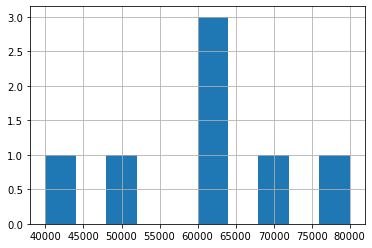

In [8]:
df['avg_salary'].hist()

## 1.1.1 Load data

В общем случае pandas является удобной библиотекой для табличных данных.
Данные мы загружаем с помощью функции read_csv() библиотеки pandas. Они записаны в файле StateFarm.csv.
Разберем основные параметры функции read_csv():

```python
pandas.read_csv(
    filepath_or_buffer, # задает путь к файлу
    sep=',', # задает символ - разделитель полей
    delimeter=',', # задает символ - разделитель полей
    header='infer', # задает номер строки, содержащей имена столбцов 
    names=None, # Задает список с именами столбцов
    index_col=None, # задает столбец, значения которого будут использоваться в качестве меток строк датафрейма
    usecols=None, # Задает подмножество столбцов
    squeeze=False, # Если спарсенные данные содержат лишь один столбец, возвращает объект Series
    decimal='.', # задает символ - десятичный разделитель (по умолчанию .)
    encoding=None # задает тип кодировки
)
```

Давайте загрузим данные из файла и начнем их анализировать:

In [9]:
df1 = pd.read_csv('./data/Auto.csv')

In [10]:
# Смотрим на первые 5 строк
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [11]:
# Смотрим на последние 5 строк
df1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [12]:
# Посмотрим на кол-во строк и столбцов
df1.shape

(397, 9)

## 1.1.2 Check NAs

In [14]:
# проверка заполненности ячеек
print('Всего записей: ', df1.shape[0])
df1.notna().sum()

Всего записей:  397


mpg             397
cylinders       397
displacement    397
horsepower      392
weight          397
acceleration    397
year            397
origin          397
name            397
dtype: int64

In [15]:
# Давайте выведем строки с пропущенными значениями horsepower
df1[df1['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


## 1.1.3 Basic stats

**Краткая статистика – info и describe**

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [17]:
df1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## 1.1.4 Correlations

Известно, что некоторые модели, например линейные, плохо работают с линейно зависимыми признаками. Из-за этого модель становится нестабильной и может работать неверно. Для того, чтобы увидеть такие зависимости, можно построить корреляционную матрицу.

In [18]:
df1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


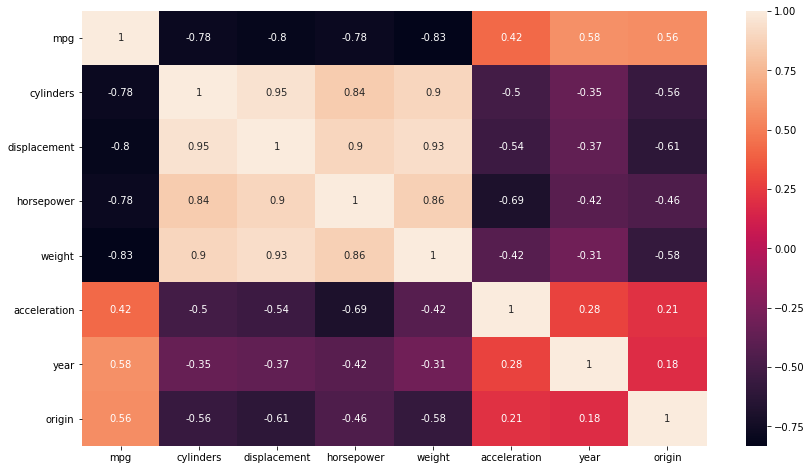

In [21]:
import matplotlib.pylab as plt
import seaborn as sns
plt.figure(figsize=(14, 8))

ax = sns.heatmap(df1.corr(), annot=True)

## 1.1.5 Scatterplot

Простой график рассеяния двух признаков:

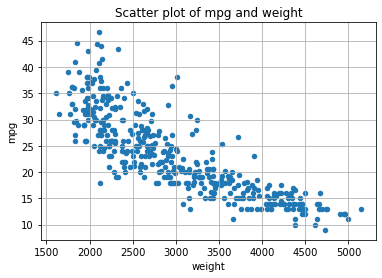

In [22]:
df1.plot.scatter('weight', 'mpg', grid=True, title='Scatter plot of mpg and weight');

Метод **scatter_matrix** позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали). Проделаем это для некоторых небинарных признаков.

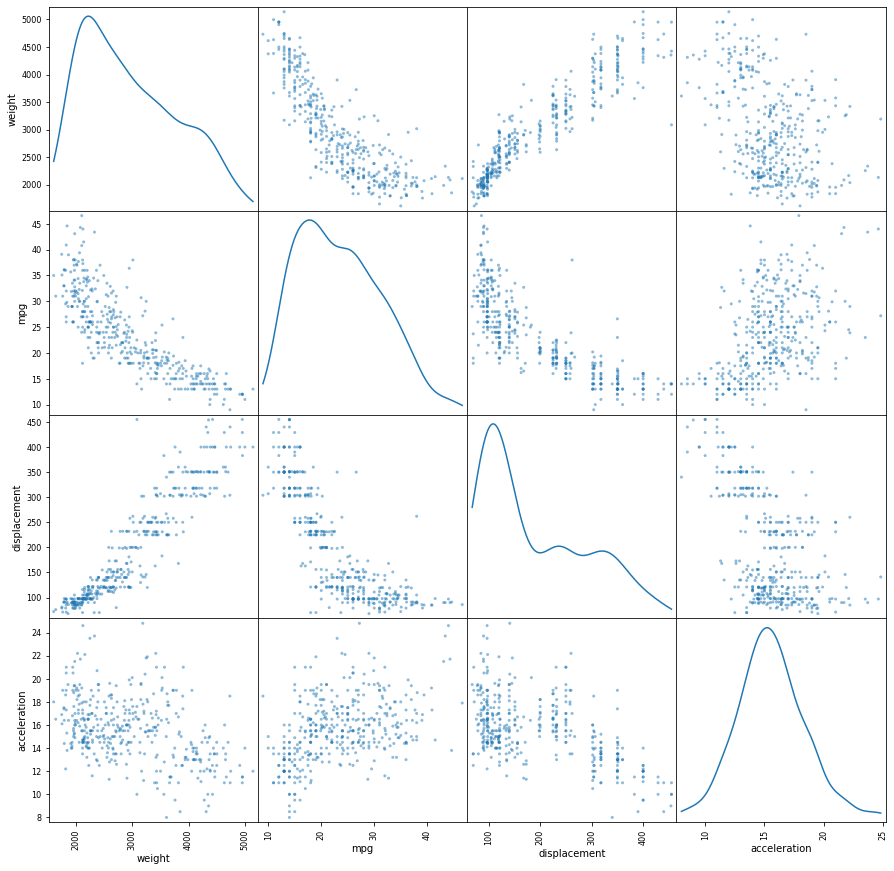

In [24]:
pd.plotting.scatter_matrix(
    df1[["weight", "mpg", "displacement", "acceleration"]], figsize=(15, 15), diagonal="kde"
)
plt.show()

<Figure size 1008x576 with 0 Axes>

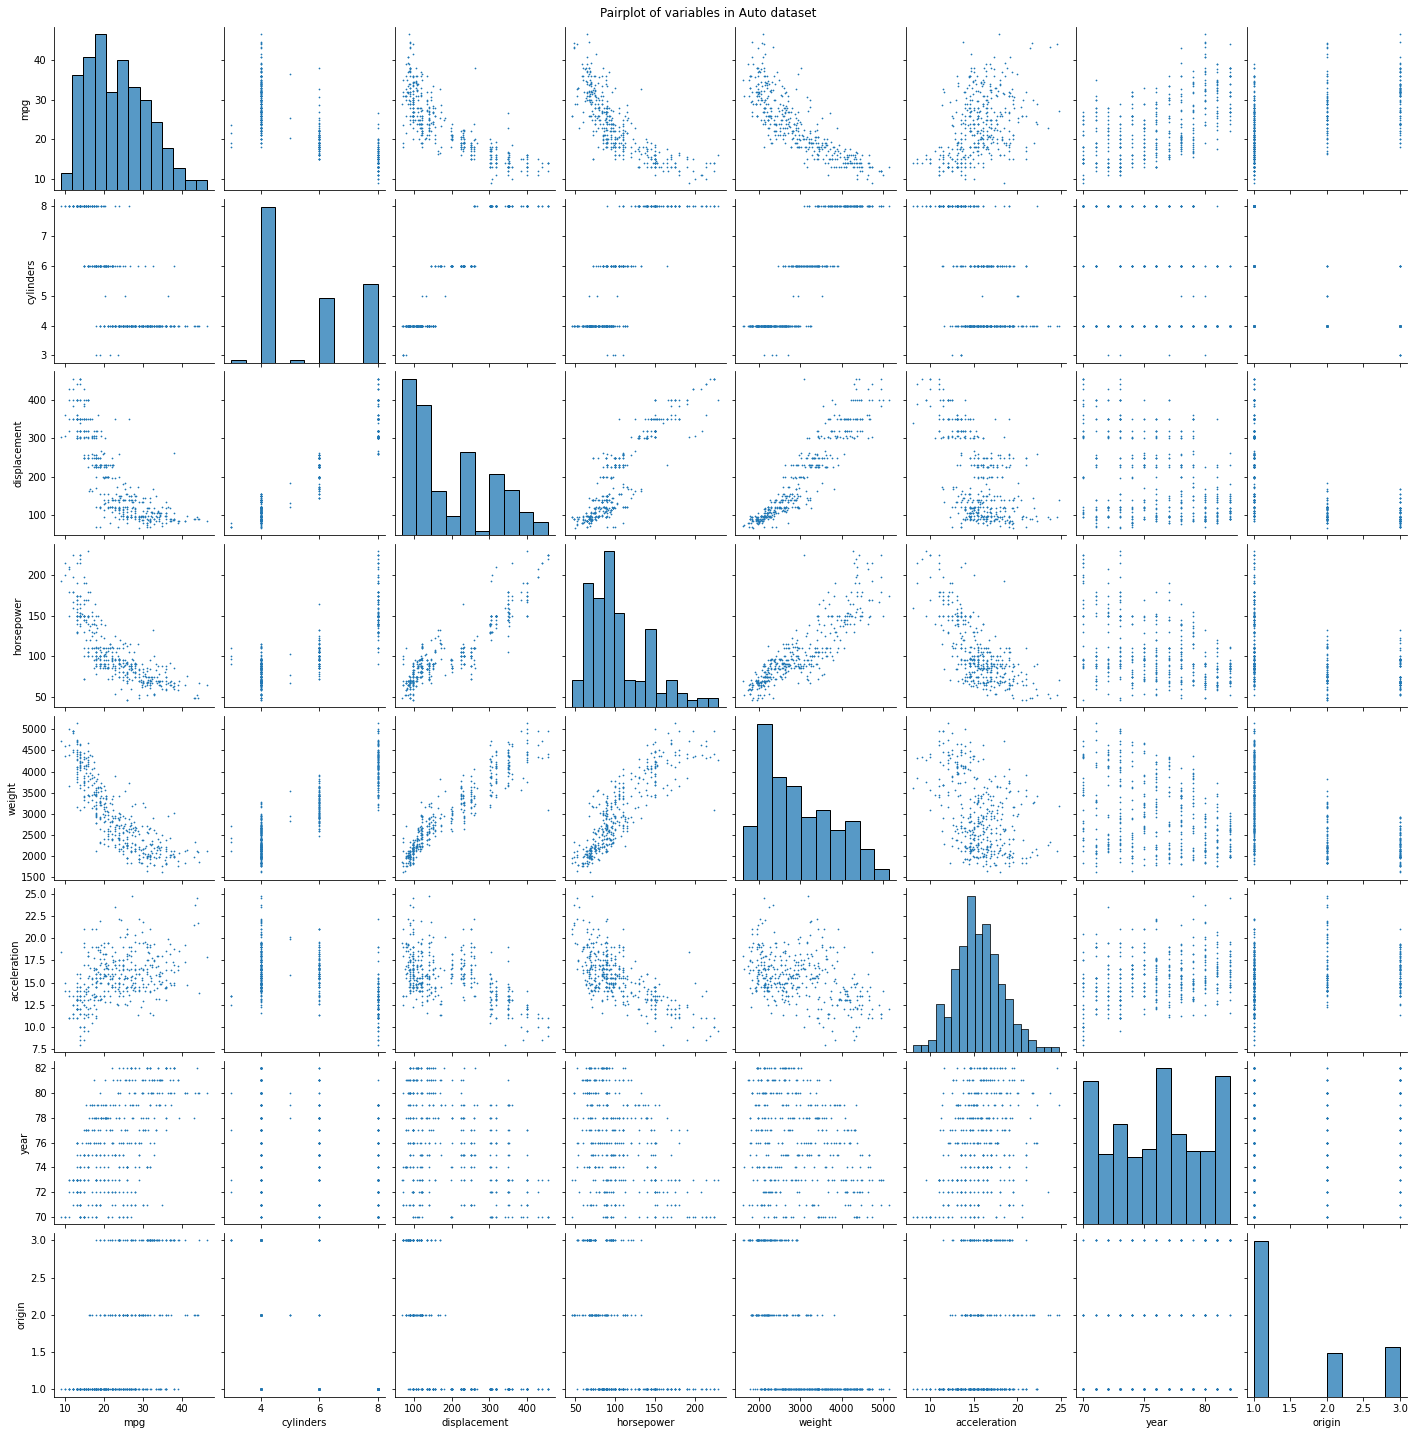

In [25]:
plt.figure(figsize=(14, 8));
ax = sns.pairplot(df1, plot_kws=dict(linewidth=0, s=3));
ax.fig.suptitle("Pairplot of variables in Auto dataset", y=1);

# 1.2 Linear regression

Далее мы перейдем к построению моделей машинного обучения. Перед тем, как разбираться и строить одну из самых известных, давайте повторим некоторые основы. 

Классическое, общее (и не самое формальное) определение машинного обучения звучит так:
- говорят, что компьютерная программа обучается при решении какой-то задачи из класса T, если ее производительность, согласно метрике P, улучшается при накоплении опыта E.

Далее в разных сценариях под T, P, и E подразумеваются совершенно разные вещи. Среди самых популярных задач T в машинном обучении:
- классификация – отнесение объекта к одной из категорий на основании его признаков
- регрессия – прогнозирование количественного признака объекта на основании прочих его признаков
- кластеризация – разбиение множества объектов на группы на основании признаков этих объектов так, чтобы внутри групп объекты были похожи между собой, а вне одной группы – менее похожи
- детекция аномалий – поиск объектов, "сильно непохожих" на все остальные в выборке либо на какую-то группу объектов
- и много других, более специфичных. 


Под опытом E понимаются данные (без них никуда), и в зависимости от этого алгоритмы машинного обучения могут быть поделены на те, что обучаются с учителем и без учителя (supervised & unsupervised learning). 
- В задачах обучения без учителя имеется выборка, состоящая из объектов, описываемых набором признаков. 
- В задачах обучения с учителем вдобавок к этому для каждого объекта некоторой выборки, называемой обучающей, известен целевой признак – по сути это то, что хотелось бы прогнозировать для прочих объектов, не из обучающей выборки.

Иногда тяжело понять данное определение машинного обучения. Еще сложнее понять различия между обучением с учителем и без учителя. В рамках данной лекции мы будем рассматривать только обучение с учителем. Давайте введем неформальный пример:

In [26]:
train_ex = pd.DataFrame()
train_ex['index'] = ['cl1', 'cl2', 'cl3', 'cl4', 'cl5']
train_ex['age'] = [20, 56, 60, 21, 18]
train_ex['income'] = [30000, 60000, 20000, 40000, 50000]
train_ex['target'] = [0, 0, 1, 0, 1]

predict_ex = pd.DataFrame()
predict_ex['index'] = ['cl6', 'cl7', 'cl8']
predict_ex['age'] = [33, 47, 19]
predict_ex['income'] = [50000, 80000, 25000]

Представим, что мы хотим построить модель, определяющую, кому можно дать кредит (клиент его вернет), а кому нельзя (не вернет). Банк работает давно, поэтому у нас есть исторические данные и реальная информация о клиентах, кто кредит вернул (target = 0), а кто не вернул (target = 1). Также предположим, что у нас есть информация о признаках клиентов - возраст и ежемесячный доход. 

In [27]:
train_ex

,index,age,income,target
0,cl1,20,30000,0
1,cl2,56,60000,0
2,cl3,60,20000,1
3,cl4,21,40000,0
4,cl5,18,50000,1


Наша задача - каким-то способом построить такую функцию от возраста и дохода, чтобы на ее выходе получить таргет. И теперь, когда придут новые клиенты, и мы бцдем знать их возраст и доход, то по нашей построенной функции мы сможем понять, кому мы сможем выдать кредит.

In [28]:
predict_ex

,index,age,income
0,cl6,33,50000
1,cl7,47,80000
2,cl8,19,25000


Теперь давайте введем более формальные определения:
- Объект (x) - то, для чего мы делем прогноз/анализ.
- Ответ/целевая переменная (y) - то, что мы предсказываем.
- X - множество объектов
- Y - множество ответов
- Признаки/факторы/features - характеристики объекта    
     
Модель(a) - это некоторая функция, которая переводит множество объектов в множество ответов.
$a:X \to Y$, $a \in A$, где A - семейтво моделей.

Нам необходимо в семействе моделей какого-либо типа найти самую лучшую модель. Для этого вводят функцю потерь:
$L:Y\times Y \to R$

- Для регрессии: $L(y,z) = (y-z)^2$
- Для классификаци: $L(y,z) = [y \neq z]$

Далее вводят функционал ошибки (функционал - это функция от функции):
$$Q(a, X) =  \frac{1}{l}\sum_{i=0}^l L(y_i, a(x_i))$$

Задача машинного обучения - минимизация функционала ошибки по множеству моделей.
$$Q(a, X)\to \min_{a \in A}$$

# Теория линейной регрессии

### Метод наименьших квадратов

Рассказ про линейные модели мы начнем с линейной регрессии. В первую очередь, необходимо задать модель зависимости объясняемой переменной $y$ от объясняющих ее факторов, функция зависимости будет линейной: $y = w_0 + \sum_{i=1}^m w_i x_i$. Если мы добавим фиктивную размерность $x_0 = 1$ для каждого наблюдения, тогда линейную форму можно переписать чуть более компактно, записав свободный член $w_0$ под сумму: $y = \sum_{i=0}^m w_i x_i = \textbf{w}^{\text{T}} \textbf{x}$. Если рассматривать матрицу наблюдения-признаки, у которой в строках находятся примеры из набора данных, то нам необходимо добавить единичную колонку слева. Зададим модель следующим образом:

$$\large \textbf y = \textbf{X} \textbf w + \epsilon,$$

где
- $\textbf{y} \in \mathbb{R}^n$ – объясняемая (или целевая) переменная;
- $\textbf{w}\in \mathbb{R}^{m+1}$ – вектор параметров модели (в машинном обучении эти параметры часто называют весами);
- $\textbf{X}$ – матрица наблюдений и признаков размерности $n$ строк на $m + 1$ столбцов (включая фиктивную единичную колонку слева) с полным рангом по столбцам: $\text{rank}\left(\textbf{X}\right) = m$;
- $\epsilon$ – случайная переменная, соответствующая случайной, непрогнозируемой ошибке модели.

Можем выписать выражение для каждого конкретного наблюдения

$$\large 
y_i = \sum_{j=0}^m w_j X_{ij} + \epsilon_i$$

Также на модель накладываются следующие ограничения (иначе это будет какая то другая регрессия, но точно не линейная):
- матожидание случайных ошибок равно нулю: $\forall i: \mathbb{E}\left[\epsilon_i\right] = 0$;
- дисперсия случайных ошибок одинакова и конечна, это свойство называется <a href="https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BC%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C">гомоскедастичностью</a>: $\forall i: \text{Var}\left(\epsilon_i\right) = \sigma^2 < \infty$;
- случайные ошибки не скоррелированы: $\forall i \neq j: \text{Cov}\left(\epsilon_i, \epsilon_j\right) = 0$.

Оценка $\widehat{w}_i$ весов $w_i$ называется *линейной*, если

$$\large \widehat{w}_i = \omega_{1i}y_1 + \omega_{2i}y_2 + \cdots + \omega_{1n}y_n,$$

где $\forall\ k\ \omega_{ki}$ зависит только от наблюдаемых данных $\textbf{X}$ и почти наверняка нелинейно. Так как решением задачи поиска оптимальных весов будет именно линейная оценка, то и модель называется *линейной регрессией*. Введем еще одно определение. Оценка $\widehat{w}_i$ называется *несмещенной* тогда, когда матожидание оценки равно реальному, но неизвестному значению оцениваемого параметра:

$$\large \mathbb{E}\left[\widehat{w}_i\right] = w_i$$

Один из способов вычислить значения параметров модели является <b>метод наименьших квадратов</b> (МНК), который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью:

$$\large \begin{array}{rcl}\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\textbf{y} - \textbf{X} \textbf{w}\right)^{\text{T}} \left(\textbf{y} - \textbf{X} \textbf{w}\right)
\end{array}$$

Для решения данной оптимизационной задачи необходимо вычислить производные по параметрам модели, приравнять их к нулю и решить полученные уравнения относительно $\textbf w$ (матричное дифференцирование неподготовленному читателю может показаться затруднительным, попробуйте расписать все через суммы, чтобы убедиться в ответе):

Шпаргалка по матричным производным:


$$\large \begin{array}{rcl} 
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} &=& \textbf{A} \\
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} \textbf{X} &=& \left(\textbf{A} + \textbf{A}^{\text{T}}\right)\textbf{X} \\
\frac{\partial}{\partial \textbf{A}} \textbf{X}^{\text{T}} \textbf{A} \textbf{y} &=&  \textbf{X}^{\text{T}} \textbf{y}\\
\frac{\partial}{\partial \textbf{X}} \textbf{A}^{-1} &=& -\textbf{A}^{-1} \frac{\partial \textbf{A}}{\partial \textbf{X}} \textbf{A}^{-1} 
\end{array}$$

Продолжим:

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} &=& \frac{\partial}{\partial \textbf{w}} \frac{1}{2n} \left( \textbf{y}^{\text{T}} \textbf{y} -2\textbf{y}^{\text{T}} \textbf{X} \textbf{w} + \textbf{w}^{\text{T}} \textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) \\
&=& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right)
\end{array}$$

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) = 0 \\
&\Leftrightarrow& -\textbf{X}^{\text{T}} \textbf{y} + \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = 0 \\
&\Leftrightarrow& \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = \textbf{X}^{\text{T}} \textbf{y} \\
&\Leftrightarrow& \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

Итак, имея в виду все определения и условия описанные выше, мы можем утверждать, опираясь на <a href="https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0">теорему Маркова-Гаусса</a>, что оценка МНК является лучшей оценкой параметров модели, среди всех <i>линейных</i> и <i>несмещенных</i> оценок, то есть обладающей наименьшей дисперсией.

Мы разобрали теорию линейной регрессии. Но перед тем, как мы перейдем к построению модели, мы должны понять, а зачем вообще делят выборку и как с помощью такого подхода оценивают качество модели.

# Валидация

Обязательно нужно выполнить проверку (валидацию) модели, т.е. посмотреть, как модель выдает прогнозы на данных, не участвовавших в обучении. Самый простой способ проверки — случайное разбиение на обучающую и тестовую выборки.

Сначала мы случайным образом разбиваем имеющиеся данные на две выборки: обучающую и тестовую. Формирование тестовой выборки — это способ преодолеть такие несовершенства неидеального мира, как ограничения в объеме данных и ресурсов, а также невозможность получения дополнительных данных из порождающего распределения. 

В данном случае тестовая выборка должна представлять собой новые, еще неизвестные модели данные. Важно использовать тестовую выборку лишь однократно. Обычно 2/3 доступных данных назначают в обучающую выборку, а оставшуюся 1/3 данных - в тестовую выборку. Другими популярными методами разбиения на обучающую/тестовую выборки являются 60/40, 70/30, 80/20 или даже 90/10, если набор данных относительно велик.

Затем необходимо построить на обучающей выборке (обучить) модели предварительной подготовки — модель импутации, модель стандартизации, модель дамми-кодирования и модель машинного обучения, которая, как мы предполагаем, может оказаться подходящей для решения данной задачи. Модели в библиотеке scikit-learn реализованы в виде классов.


У любой модели есть параметры, которые мы находим в ходе обучения. Например, у нас будет класс SimpleImputer, который обучает модель предварительной подготовки — модель импутации пропущенных значений. Здесь параметрами будут статистики, которые мы используем для импутации пропусков (среднее, медиана). 

Например, для класса LoisticRegression, строящего модель машинного обучения — модель логистической регрессии, параметрами будут регрессионные коэффициенты для соответствующих предикторов, для класса DecisionTreeClassifier, строящего другую модель машинного обучения - дерево решений CART, параметрами будут правила расщепления (предиктор расщепления и расщепляющее значение).

Обратите внимание, что для моделей помимо понятия «параметр» есть понятие «гиперпараметр». Параметры мы находим в ходе обучения модели. А вот гиперпараметры нельзя «выучить» в процессе обучения, их задают перед обучением модели и настраивают на отложенной выборке. 

Модель импутации не может самостоятельно выяснить оптимальную стратегию импутации. Поэтому стратегия импутации - это гиперпараметр модели, который позволяет улучшить качество модели и настраивается на отложенной выборке (для этого у класса SimpleImputer есть гиперпараметр strategy). 

Логистическая регрессия не может самостоятельно выяснить оптимальное значение силы регуляризации. Поэтому сила регуляризации - это гиперпараметр модели, который позволяет улучшить качество модели и настраивается на отложенной выборке (для этого у класса LoisticRegression есть гиперпараметр C). 

Дерево решений CART не может самостоятельно выяснить оптимальное значение максимальной глубины. Поэтому максимальная глубина — это тоже гиперпараметр, который мы настраиваем на отложенной выборке (для этого у класса
DecisionTreeClassifier, строящего дерево CART, есть гиперпараметр max_depth).

После обучения модели на предыдущем шаге возникает закономерный вопрос: а насколько «хорошо» качество полученной модели? И вот теперь наступает время использовать независимую тестовую выборку. Поскольку модель еще «не видела» эти тестовые данные, такой шаг даст относительно надежную и несмещенную оценку качества на новых, незнакомых данных. 

Теперь мы берем тестовую выборку и используем модель для прогнозирования меток классов зависимой переменной по наблюдениям. Затем мы берем спрогнозированные метки классов и сравниваем их с фактическими метками классов для оценки обобщающей способности (здесь мы можем использовать правильность — долю правильно спрогнозированных наблюдений от общего количества наблюдений или ошибку классификации). 

Однако есть сложности. Когда мы строим модели с разными значениями гиперпараметров на обучающей выборке, а проверяем их качество на тестовой выборке, возникает проблема. Мы используем тестовую выборку и для настройки гиперпараметров и для оценки качества модели. Поскольку мы использовали тестовую выборку для настройки гиперпараметров, мы больше не можем использовать ее для оценки качества модели. Это та же самая
причина, по которой нам изначально нужно разбивать данные на обучающую и тестовую выборки. 

Теперь для оценки качества модели нам необходим независимый набор данных, то есть набор, который не использовался для построения модели и настройки ее гиперпараметров и применяется лишь однократно для оценки качества модели. Помним, что тестовая выборка — прообраз новых данных, о которых мы ничего не знаем. 

В противном случае мы просто будем настраивать нашу модель под тестовую выборку, ведь любой выбор, сделанный, исходя из метрики на тестовом наборе, «сливает» модели информацию тестового набора. В итоге мы можем получить оптимистичные результаты.

Для простоты пока пренебрежем этим недостатком случайного разбиения на обучающую и тестовую выборки, поскольку наша задача построить базовую модель машинного обучения, не прибегая к оптимизации гиперпараметров. Такое часто бывает, когда, например, дана задача классификации и нужно сопоставить качество нескольких алгоритмов, строят базовые модели логистической регрессии, случайного леса и градиентного бустинга и сравнивают.

Итак, мы получили оценку качества модели на тестовых данных. Таким образом, уже нет смысла резервировать тестовую выборку. Если качество нас устраивает, мы обучаем модель на всех доступных данных и применяем модель, обученную на всех доступных данных, к новым данным.

Давайте сделаем случайное разбиение данных на обучающую и тестовую выборки: сформируем обучающий массив признаков, тестовый массив признаков, обучающий массив меток, тестовый массив меток. Это можно будет сделать с помощью функции train_test_split() модуля model_selection библиотеки scikit-learn. В
scikit-learn для массива данных обычно используется заглавная X, а для массива меток - строчная y.

```python
# импортируем функцию train_test_split(), с помощью
# которой разбиваем данные на обучающие и тестовые
from sklearn.model_selection import train_test_split

# разбиваем данны на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    data.drop['Response', axis=1], # 1
    data['Response'], # 2
    test_size=0.3, # 3
    stratify=data['Response'], # 4
    random_state=42 # 5
)
```

- 1. Указываем массив признаков
- 2. Указываем зависимую переменную (таргет)
- 3. Настраиваем размер тестовой выборки (в процентах)
- 4. Стратифицированное ли разбиение?
- 5. Так как разбиение случайно, то этот параметр позволяет воспроизводить результат

## 1.2.1 Running linear regression

В самом начале мы исследовали датасет с автомобилем. И мы помним, что в одном из признаков были пропущенные значения. Давайте их удалим. 
Также обратим внимание, что признак name задан в виде текста. Модель умеет работать только с цифрами, поэтому в данной модели давайте также удалим этот признак.

In [32]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [33]:
# сводная информация по пропущенным значениям
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [34]:
# удаление столбца name
df1 = df1.drop('name', axis=1)

# удаление всех строк, содержащих хоть одну пропущенную ячейку
df1 = df1.dropna()

In [35]:
# сводная информация по пропущенным значениям
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

In [36]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [37]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Теперь мы знаем, зачем делить выборку на несколько частей. Давайте разделим ее. В качестве целевой переменной будет выступать столбец mpg:

In [39]:
target_variable = 'mpg'

X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(target_variable, axis=1), 
    df1[target_variable], 
    test_size = 0.2, 
    random_state=0)

print(f'Sanity check for dimensions of variables: {X_train.shape, X_test.shape, y_train.shape, y_test.shape}')

Sanity check for dimensions of variables: ((313, 7), (79, 7), (313,), (79,))


In [40]:
mdl = sm.OLS(y_train, X_train)     # training on train observations
fmdl = mdl.fit()
print(fmdl.summary(title='Baseline model for Auto dataset', alpha=.01))

y_pred = fmdl.predict(X_test)   # predicted values on the testing set
print(f'\nOut of sample R^2 is {r2_score(y_test, y_pred):.2f}')

                            Baseline model for Auto dataset                            
Dep. Variable:                    mpg   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2289.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                   4.76e-260
Time:                        21:32:34   Log-Likelihood:                         -825.92
No. Observations:                 313   AIC:                                      1666.
Df Residuals:                     306   BIC:                                      1692.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.005      0.995]
---------------------------------------

Краткая сводка по функциям измерения ошибки в задачах регрссии: 
$$MSE(a, X) =  \frac{1}{l}\sum_{i=0}^l (a(x_i) - y_i)^2$$
$$RMSE =  \sqrt{MSE(a, X)}$$
$$R^2(a, X) =  1 - \frac{\sum_{i=0}^l (a(x_i) - y_i)^2}{\sum_{i=0}^l (y_i - \bar y)^2}$$

$R^2(a, X)$ - коэффициент детеринации. По сути - нормированный MSE. Чем ближе к 1, тем лучше.

## 1.2.2 Improving the model

In [41]:
target_variable = 'mpg'
columns_to_drop = [target_variable]

X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(columns_to_drop, axis=1), 
    df1[target_variable], 
    test_size = 0.2, 
    random_state=0)

print(f'Sanity check for dimensions of variables: {X_train.shape, X_test.shape, y_train.shape, y_test.shape}')

Sanity check for dimensions of variables: ((313, 7), (79, 7), (313,), (79,))


In [42]:
sm.add_constant(X_train)

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
220,1.0,4,85.0,70.0,1945,16.8,77,3
256,1.0,6,225.0,100.0,3430,17.2,78,1
301,1.0,4,105.0,70.0,2200,13.2,79,1
193,1.0,6,200.0,81.0,3012,17.6,76,1
57,1.0,4,113.0,95.0,2278,15.5,72,3
...,...,...,...,...,...,...,...,...
325,1.0,4,90.0,48.0,2085,21.7,80,2
194,1.0,6,232.0,90.0,3085,17.6,76,1
118,1.0,4,116.0,75.0,2158,15.5,73,2
48,1.0,6,250.0,88.0,3139,14.5,71,1


In [43]:
mdl = sm.OLS(y_train, sm.add_constant(X_train))     # training on train observations
fmdl = mdl.fit()
print(fmdl.summary(title='Second iteration for Auto dataset', alpha=.01))

y_pred = fmdl.predict(sm.add_constant(X_test))   # predicted values on the testing set
print(f'\nOut of sample R^2 is {r2_score(y_test, y_pred):.2f}')

                      Second iteration for Auto dataset                       
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     193.9
Date:                Sat, 20 Mar 2021   Prob (F-statistic):          2.71e-108
Time:                        21:46:35   Log-Likelihood:                -820.59
No. Observations:                 313   AIC:                             1657.
Df Residuals:                     305   BIC:                             1687.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.005      0.995]
--------------------------------------------------------------------------------
const          -16.8911      5.197     -3.250   

## 1.2.3 Linear regression by hands

In [49]:
import numpy as np
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)

# Add the column of ones
X_plus_ones = np.column_stack((X_train, np.ones(X_train.shape[0])))
X_plus_ones.shape

(313, 8)

In [50]:
X_plus_ones[:5]

array([[   4. ,   85. ,   70. , 1945. ,   16.8,   77. ,    3. ,    1. ],
       [   6. ,  225. ,  100. , 3430. ,   17.2,   78. ,    1. ,    1. ],
       [   4. ,  105. ,   70. , 2200. ,   13.2,   79. ,    1. ,    1. ],
       [   6. ,  200. ,   81. , 3012. ,   17.6,   76. ,    1. ,    1. ],
       [   4. ,  113. ,   95. , 2278. ,   15.5,   72. ,    3. ,    1. ]])

$$ \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}$$

In [51]:
coefficients_analytical = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_plus_ones.T, X_plus_ones)), 
                                              X_plus_ones.T), 
                                    y_train)

In [52]:
coefficients_analytical

array([ -0.3903,   0.0174,  -0.0103,  -0.0068,   0.1414,   0.7413,   1.1283, -16.8911])

Если сравнить данные коэффициенты с коэффициентами предыдущей модели, то мы увидим 100% попадание.

# 1.3 k-Nearest Neighbors

# Метод ближайших соседей

Метод ближайших соседей (k Nearest Neighbors, или kNN) — тоже очень популярный метод классификации, также иногда используемый в задачах регрессии. Это, наравне с деревом решений, один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей, какие преобладают, таков и ты. Формально основой метода является гипотезой компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных. 

Например, если не знаешь, какой тип товара указать в объявлении для Bluetooth-гарнитуры, можешь найти 5 похожих гарнитур, и если 4 из них отнесены к категории "Аксессуары", и только один - к категории "Техника", то здравый смысл подскажет для своего объявления тоже указать категорию "Аксессуары".

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:
 - Вычислить расстояние до каждого из объектов обучающей выборки
 - Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально
 - Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей
 
 Примечательное свойство такого подхода  – его ленивость. Это значит, что вычисления начинаются только в момент классификации тестового примера, а заранее, только при  наличии обучающих примеров, никакая модель не строится. В этом отличие, например, от ранее рассмотренного дерева решений, где сначала на основе обучающей выборки строится дерево, а потом относительно быстро происходит классификация тестовых примеров. 
 
Стоит отметить, что метод ближайших соседей – хорошо изученный подход (в машинном обучении, эконометрике и статистике больше известно наверно только про линейную регрессию). Для метода ближайших соседей существует немало важных теорем, утверждающих, что на "бесконечных" выборках это оптимальный метод классификации. Авторы классической книги "The Elements of Statistical Learning" считают kNN теоретически идеальным алгоритмом, применимость которого просто ограничена вычислительными возможностями и проклятием размерностей. 

### Метод ближайших соседей в реальных задачах
- В чистом виде kNN может послужить хорошим стартом (baseline) в решении какой-либо задачи;
- В соревнованиях Kaggle kNN часто используется для построения мета-признаков (прогноз kNN подается на вход прочим моделям) или в стекинге/блендинге;
- Идея ближайшего соседа расширяется и на другие задачи, например, в рекомендательных системах простым начальным решением может быть рекомендация какого-то товара (или услуги), популярного среди *ближайших соседей* человека, которому хотим сделать рекомендацию;
- На практике для больших выборок часто пользуются *приближенными* методами поиска ближайших соседей. [Вот](https://www.youtube.com/watch?v=UUm4MOyVTnE) лекция Артема Бабенко про эффективные алгоритмы поиска ближайших соседей среди миллиардов объектов в пространствах высокой размерности (поиск по картинкам). Также известны открытые библиотеки, в которых реализованы такие алгоритмы, спасибо компании Spotify за ее библиотеку [Annoy](https://github.com/spotify/annoy).

Качество классификации методом ближайших соседей зависит от нескольких параметров:
 - число соседей
 - метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100. 
 - веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")

## 1.3.1 Run kNN

In [53]:
target_variable = 'mpg'
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(target_variable, axis=1), 
    df1[target_variable], 
    test_size = 0.2, random_state=0)

print(f'Sanity check for dimensions of variables: {X_train.shape, X_test.shape, y_train.shape, y_test.shape}')

Sanity check for dimensions of variables: ((313, 7), (79, 7), (313,), (79,))


### Класс KNeighborsClassifier в Scikit-learn
Основные параметры класса sklearn.neighbors.KNeighborsClassifier:
 - weights: "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция
 - algorithm (опционально): "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем - расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.
 - leaf_size (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей
 - metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие

In [54]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(
    n_neighbors=5, 
    weights='uniform')

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)   # predicted values on the testing set
print(f'\nOut of sample R^2 is {r2_score(y_test, y_pred):.2f}')


Out of sample R^2 is 0.76


## 1.3.2 Scale the data and rerun it
Данный алгоритм очень чувстсвителен к масштабу данных (на самом делее, как и любая регрессия).

Давайте воспользуемся классом StandardScaler, строящим модель стандартизации. Самая простая стандартизация подразумевает, что из каждого значения переменной мы вычтем среднее значение и полученный результат разделим на стандартное отклонение (в случае присутствия бинарных переменных для улучшения интерпретируемости делят на два стандартных отклонения).

```python
from sklearn.preprocessing import StandardScaler(
    copy=True, # 1
    with_mean=True, # 2
    with_std=True # 3
)
```
- 1. Если задано False, пробует избежать копирования и вместо этого выполняет стандартизацию на месте. Стандартизация на месте не всегда гарантируется. Например, если данные не являются массивом NumPy или CSR матрицей из модуля scipy.sparse, все равно может быть возвращена копия.
- 2. Центрирует данные (вычитает из исходного значения переменной среднее значение) перед тем, как поделить на стандартное отклонение.
- 3. Делит на стандартное отклонение.

Стандартизация необходима для некоторых методов машинного обучения, в частности, для линейной и логистической регрессий. Она приводит количественные независимые переменные к единому масштабу. Если не привести признаки к единому масштабу, то прогноз будут определять признаки, имеющие наибольший разряд и соответственно наибольшую дисперсию. 

Различный масштаб признаков приведет к ухудшению сходимости в случае применения градиентного спуска (его используют для оценивания регрессионных коэффициентов). Кроме того, единый масштаб позволит нам сравнивать регрессионные коэффициенты при предикторах между собой. 

В нашем наборе только количественные признаки, если бы здесь были категориальные признаки, мы обязательно превратили бы их в количественные с помощью дамми-кодирования (регрессионные модели работают только с количественными признаками и для моделирования мы используем массивы NumPy, каждый столбец которого должен быть количественным признаком, датафреймы pandas внутренне преобразовываются в массивы NumPy). 

У нас каждый уровень категориальной переменной стал бы отдельным бинарным столбцом
со значениями 0 или 1 и такие переменные не нужно стандартизировать.

Мы импортируем класс StandardScaler и создаем его экземпляр.

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X_train)

standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [56]:
knn = KNeighborsRegressor(
    n_neighbors=5, 
    weights='uniform')

knn.fit(standardized_X, y_train)
y_pred = knn.predict(standardized_X_test)   # predicted values on the testing set
print(f'\nOut of sample R^2 is {r2_score(y_test, y_pred):.2f}')


Out of sample R^2 is 0.88


## 1.3.3 Comparison between kNN and LR

In [57]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [58]:
x_var = 3

var_name = X_train.columns[x_var]
xx_train = X_train.iloc[:, x_var].values.reshape(-1, 1)
xx_test = X_test.iloc[:, x_var].values.reshape(-1, 1)

x_grid = np.linspace(xx_train.min(), xx_train.max(), 100).reshape(-1, 1)

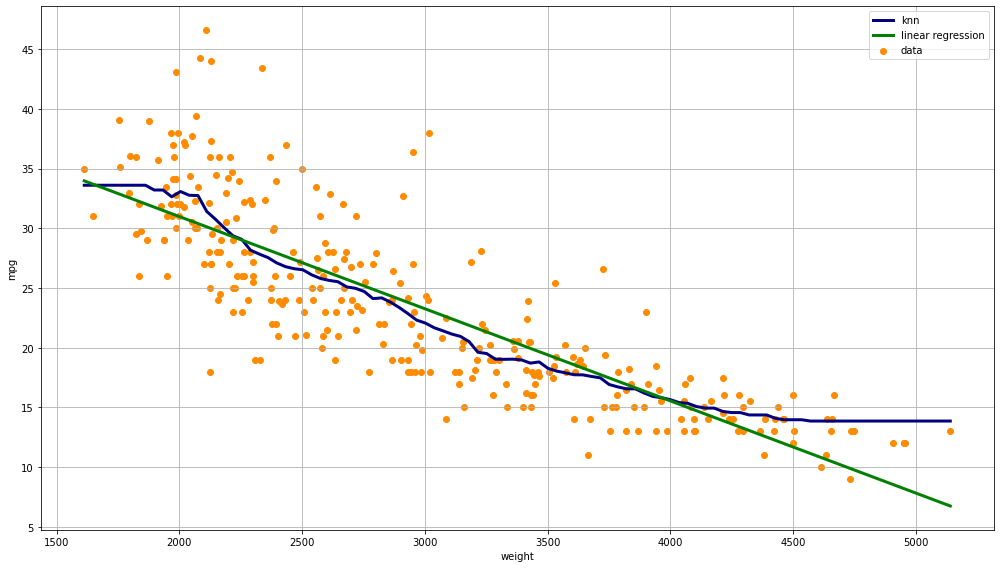

In [64]:
n_neighbors = 50

plt.figure(figsize=(14, 8))
plt.scatter(xx_train, y_train, color='darkorange', label='data')

# knn prediction
knn = KNeighborsRegressor(n_neighbors, weights='uniform')
knn.fit(xx_train, y_train.values)
y_grid = knn.predict(x_grid)
plt.plot(x_grid, y_grid, color='navy', label='knn', linewidth=3)

# linear regression prediction
mdl = sm.OLS(y_train.values, sm.add_constant(xx_train)).fit()    # training on train observations
y_grid = mdl.predict(sm.add_constant(x_grid))   # predicted values on the testing set
plt.plot(x_grid, y_grid, color='green', label='linear regression', linewidth=3);

plt.ylabel(target_variable)
plt.xlabel(var_name);
plt.axis('tight');
plt.legend();

plt.grid()
plt.tight_layout();
plt.show();

## 1.3.4 Fitting kNN for different k

### Сравним разное количество ближайших соседей

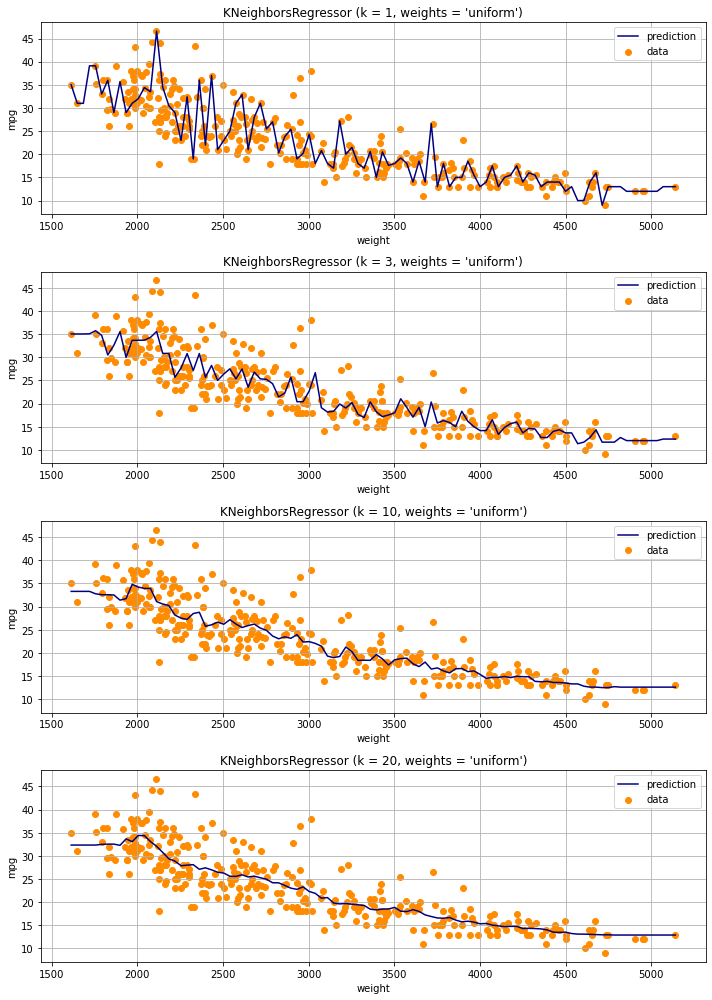

In [63]:
weights = 'uniform'

plt.figure(figsize=(10, 14))

for i, n_neighbors in enumerate([1, 3, 10, 20]):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(xx_train, y_train.values)
    
    y_grid = knn.predict(x_grid)

    plt.subplot(4, 1, i + 1);
    plt.scatter(xx_train, y_train, color='darkorange', label='data');
    plt.plot(x_grid, y_grid, color='navy', label='prediction');
    plt.axis('tight');
    plt.ylabel(target_variable)
    plt.xlabel(var_name);
    plt.legend();
    plt.grid()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights));

plt.tight_layout();
plt.show();

### Сравним разные настройки весов

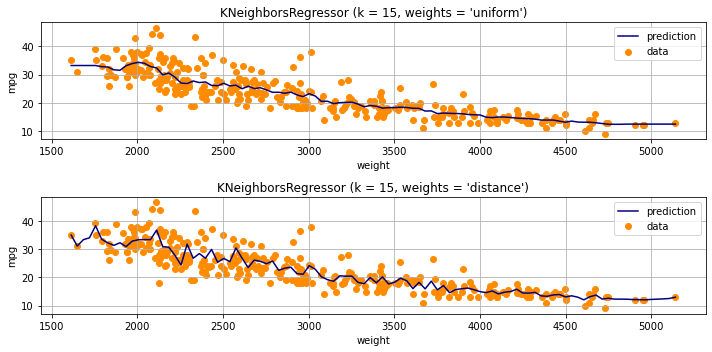

In [62]:
n_neighbors = 15

plt.figure(figsize=(10, 5))

for i, weights in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(xx_train, y_train.values)
    
    y_grid = knn.predict(x_grid)

    plt.subplot(2, 1, i + 1);
    plt.scatter(xx_train, y_train, color='darkorange', label='data');
    plt.plot(x_grid, y_grid, color='navy', label='prediction');
    plt.axis('tight');
    plt.ylabel(target_variable)
    plt.xlabel(var_name);
    plt.legend();
    plt.grid()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights));

plt.tight_layout();
plt.show();

## Кросс-валидация - продвинутый метод оценки моделей

Ранее мы говорили о таком простом способе проверки модели, как случайное разбиение на обучающую и тестовую выборки. 

Еще одним методом проверки является К-блочная перекрестная проверка. Метод К-блочной
перекрестной проверки (ее еще называют кросс-валидацией) разбивает весь набор данных на К блоков (обычно 5 или 10) приблизительно равного объема, а затем К раз на К-1 блоках осуществляет обучение модели (эти блоки называют обучающими, по сути они формируют обучающую выборку), а блок, не участвовавший в обучении, использует для проверки (этот блок называют тестовым блоком, по сути он является тестовой выборкой, однако если перекрестная проверка используется внутри комбинированной проверки для настройки гиперпараметров и выбора оптимальной модели, блок называют проверочным блоком или проверочной выборкой).

Проще говоря, для набора данных, разбитого на 5 блоков, будет построено 5 моделей, первая модель обучается по всем данным, за исключением данных из первого блока,
вторая модель обучается по всем данным, за  исключением данных из второго блока и т.д.

Качество модели проверяется путем применения модели, построенной по обучающим блокам, к тестовому блоку, исключенного из процесса построения данной модели. Затем метрики качества, вычисленные по каждому тестовому блоку, усредняют и получают итоговую метрику качества модели.

Отметим основную разницу между методом разбиения на обучающую и тестовую выборки и К-блочной перекрестной проверкой: в К-блочной перекрестной проверке для обучения и проверки используются все доступные данные. 

Идея, лежащая в основе этого метода, состоит в уменьшении пессимистичного смещения за счет использования большего количества данных для обучения вместо того, чтобы отложить
в качестве тестовой выборки довольно большую часть набора.

Для выполнения перекрестной проверки мы можем воспользоваться функцией cross_val_score().

```python
from sklearn.model_selection import cross_val_score(
    estimator, # 1
    X, # 2
    y=None, # 3
    scoring=None, # 4
    cv='warn', # 5
    n_jobs=None # 6
)
```

- 1 - Модель, используемая для обучения
- 2 - Массив признаков
- 3 - Массив меток
- 4 - Метрика, оцениваемая в ходе перекрестной проверки
- 5 - Стратегия перекрестной проверки. Возможные значения:
    - None, будет использована 5-блочная перекрестная проверка
    - целочисленное значение, задает количество блоков для (Stratified)Kfold

    Для None и целочисленных значений, если модель является классификатором и y является либо бинарной, либо мультиклассовой переменной, используется StratifiedKfold. Во всех остальных случаях используется Kfold.
- 6 - Количество используемых ядер процессора для распараллеливания

Используя функцию cross_val_predict(), мы в каждой итерации перекрестной проверки с помощью модели, обученной на обучающих блоках, можем получить спрогнозированные значения/спрогнозированные вероятности для наблюдений каждого тестового блока, затем эти спрогнозированные значения/спрогнозированные вероятности конкатенируются и мы получаем спрогнозированные значения/спрогнозированные вероятности для всего набора в отсортированном порядке.

```python
from sklearn.model_selection import cross_val_predict(
    estimator, # 1
    X, # 2
    y=None, # 3
    groups=None, # 4
    n_jobs=None, # 5
    method='predict', # /'predict_proba'   6
    cv=None # 7
)
```

- 1 - Модель, используемая для обучения
- 2 - Массив признаков
- 3 - Массив меток
- 4 - Массив вида (n_samples,), содержащий метки группы для наблюдений, определяемых в обучающую/тестовую выборки (например, GroupKFold)
- 5 - Количество используемых ядер процессора для распараллеливания
- 6 - Вывод спрогнозированных значений или спрогнозированных вероятностей
- 7 - Стратегия перекрестной проверки. Возможные значения:
    - None, будет использована 5-блочная перекрестная проверка
    - целочисленное значение, задает количество блоков для (Stratified)Kfold

    Для None и целочисленных значений, если модель является классификатором и y является либо бинарной, либо мультиклассовой переменной, используется StratifiedKfold. Во всех остальных случаях используется Kfold.